# Figure making tutorial
Author: Sander Keemink (sander.keemink@donders.ru.nl)

In this notebook we will generate some basic simulation results, and adjust the plotting paremeters.

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

###  2D systems: coupled neural populations
We will be simulating the following system and trying to plot its behavior in a logical way.

$$ \frac{dr_E}{dt} = -r_E + f(w_{EE}r_E - w_{EI}r_I+I) $$
$$ \frac{dr_I}{dt} = -r_I + f(w_{IE}r_E - w_{II}r_I+I) $$
$$ f(x) = \frac{1}{1+\exp(-sx)} $$
<center><img src='neural systems - exc-inh pair.svg' width=600>
(often referred to as Wilson-Cowan models)

Set parameters

In [3]:
# timescale
taus = [1, 1]


# connectivity
taus = [0.1, 1]
s = 1
wEE = 5
wIE = 30
wEI = 5
wII = 4.4
W = np.array([[wEE, -wEI], [wIE, -wII]])
Is = [0.3, -10]

# collect parameters
par = [s, W, Is]

# functions
f = lambda x, s: 1/(1+np.exp(-s*x))
drdt = lambda r, t, par: -r/taus + f(np.dot(par[1], r) + par[2], par[0])/taus

Simulate

In [4]:
# set starting condition
r0 = np.array([0, 0])

# set timepoints to store
times = np.linspace(0, 10, 1000)

# simulate
sol = odeint(drdt, r0, times, args=(par, ))
rE = sol[:, 0]
rI = sol[:, 1]

Plot the activities against each other

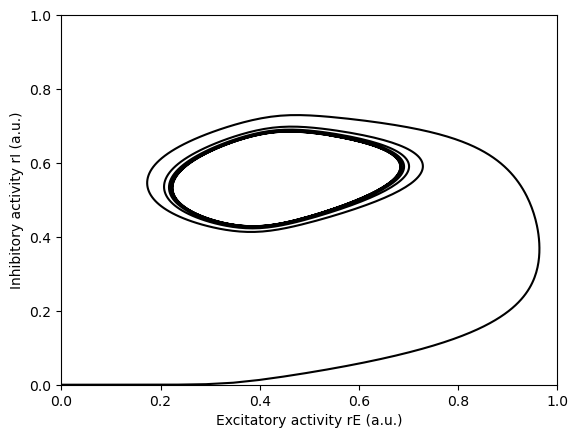

In [19]:
def plotrErI(fontsize=10, color='k'):
    plt.plot(rE, rI, color=color)
    plt.xlabel('Excitatory activity rE (a.u.)', fontsize=fontsize)
    plt.ylabel('Inhibitory activity rI (a.u.)', fontsize=fontsize)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
plotrErI(fontsize=10)

Plot the activities across time

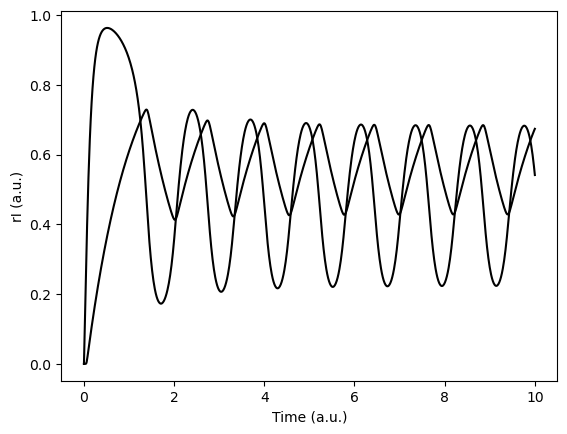

In [20]:
def plotTimesVSr(r, label, fontsize=10, color='k'):
    plt.plot(times, r, color=color)
    plt.xlabel('Time (a.u.)', fontsize=fontsize)
    plt.ylabel(label, fontsize=fontsize)
plotTimesVSr(rE, 'rE (a.u.)')
plotTimesVSr(rI, 'rI (a.u.)')

Plot all together

In [21]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

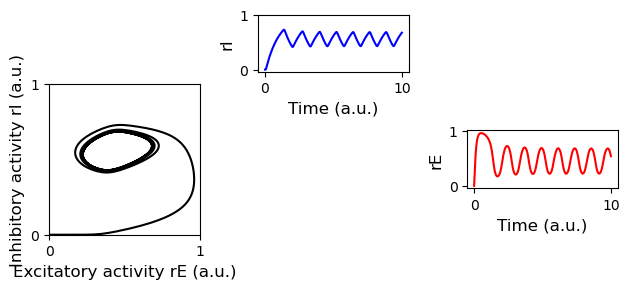

In [27]:
fig = plt.figure()

# plot rE VS rI
ax1 = plt.subplot(131, aspect=1)
plt.xticks(np.linspace(0, 1, 2))
plt.yticks(np.linspace(0, 1, 2))
plotrErI(fontsize=12)

# plot rE over time
ax2 = plt.subplot(133, aspect=4)
plotTimesVSr(rE, 'rE', fontsize=12, color='r')
plt.xticks(np.linspace(0, 10, 2))
plt.yticks(np.linspace(0, 1, 2))

# plot rI over time
ax3 = plt.subplot(232, aspect=4)
plotTimesVSr(rI, 'rI', fontsize=12, color='b')
plt.xticks(np.linspace(0, 10, 2))
plt.yticks(np.linspace(0, 1, 2))

plt.tight_layout() # this often fixes a lot of layout problems. Try plotting without it!
plt.savefig('fig.svg')


# Designing a figure
You have a decent set of results, but now want to put them together into a useful and readable figure. Today we will follow these steps to make a production-ready figure:
1. Sketch what we want to have on the whiteboard
2. Adjust as much as we can in code
3. Adjust final steps in Inkscape
4. Export to required format and in good quality
